# Analyzing Recent COVID-19 Trends Using Python

We will try to scrap the data from a website and analyse it.

In [1]:
from bs4 import BeautifulSoup
from datetime import date, datetime

In [4]:
from urllib.request import Request, urlopen
import requests

# Web scraping

In [9]:
today = date.today()

In [10]:
today

datetime.date(2021, 9, 2)

In [11]:
yesterday_str = "%s %d, %d" %(date.today().strftime('%b'), today.day-1, today.year)

In [12]:
yesterday_str

'Sep 1, 2021'

In [13]:
url = 'https://www.worldometers.info/coronavirus/#countries'

req = Request(url, headers={'User-Agent':"Mozila/5.0"})
webpage = urlopen(req)

soup = BeautifulSoup(webpage,'html.parser')


Let's fidn the table. 

In [21]:
table = soup.find_all('table',{'id':'main_table_countries_yesterday'})

In [30]:
containers = table[0].findAll('tr',{"style":""})

In [31]:
title = countries[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [38]:
table = soup.findAll('table',{'id':'main_table_countries_yesterday'})
containers = table[0].findAll('tr',{"style":""})
title = containers[0]
del containers[0]


In [55]:
all_data = []
clean = True

for country in containers:
    country_data = []
    country_container = country.findAll('td')
    
    if country_container[1].text == 'China':
        continue
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        
        if clean:
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(",","")
                
                if final_feature.find('+') != -1:
                    final_feature = final_feature.replace("+","")
                    final_feature = float(final_feature)
                elif final_feature.find("-") != -1:
                    final_feature = final_feature.replace("-","")
                    final_feature = float(final_feature)*-1
        if final_feature == 'N/A':
            final_feature = 0
        elif final_feature == "" or final_feature == " ":
            final_feature = -1
            
        country_data.append(final_feature)
        
    all_data.append(country_data)
    
    

In [58]:
all_data[:1]

[['World',
  '219231865',
  682274.0,
  '4543751',
  10470.0,
  '196007785',
  634203.0,
  '18680329',
  '105761',
  '28125',
  '582.9',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1]]

let's convet it to a data frame.

In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.DataFrame(all_data)

In [67]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,219231865,682274.0,4543751,10470.0,196007785,634203.0,18680329,105761,28125,...,-1,-1,-1,All,\n,-1,-1,-1,-1,-1
1,USA,40330712,184420.0,659927,1480.0,31137936,114012.0,8532849,25598,121016,...,586680183,1760387,333267823,North America,8,505,1,553,4,"25,604"
2,India,32856863,45971.0,439559,505.0,32021097,34775.0,396207,8944,23539,...,523184293,374820,1395827756,Asia,42,3176,3,33,0.4,284
3,Brazil,20804215,26348.0,581228,703.0,19775873,40426.0,447114,8318,97070,...,56897224,265475,214322393,South America,10,369,4,123,3,"2,086"
4,Russia,6937333,18368.0,184014,790.0,6199379,18325.0,553940,2300,47514,...,179100000,1226649,146007547,Europe,21,793,1,126,5,"3,794"


In [66]:
for name in title.find_all('th'):
    print(name.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl
New Cases/1M pop
New Deaths/1M pop
Active Cases/1M pop


In [68]:
column_names = ['Country', 'Total Cases','New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
                'Serious Critical', 'Total Cases/1M','Total Deaths/1M','Total tests','Tests/1M','Population','Continent']

In [70]:
len(column_names)

15

let's drop the reset of the columns.

In [71]:
df.columns

RangeIndex(start=0, stop=21, step=1)

In [72]:
df.drop([15,16,17,18,19,20],axis=1,inplace=True)

In [73]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,219231865,682274.0,4543751,10470.0,196007785,634203.0,18680329,105761,28125,582.9,-1,-1,-1,All
1,USA,40330712,184420.0,659927,1480.0,31137936,114012.0,8532849,25598,121016,1980,586680183,1760387,333267823,North America
2,India,32856863,45971.0,439559,505.0,32021097,34775.0,396207,8944,23539,315,523184293,374820,1395827756,Asia
3,Brazil,20804215,26348.0,581228,703.0,19775873,40426.0,447114,8318,97070,2712,56897224,265475,214322393,South America
4,Russia,6937333,18368.0,184014,790.0,6199379,18325.0,553940,2300,47514,1260,179100000,1226649,146007547,Europe


In [74]:
df.columns = column_names

In [75]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Total Cases/1M,Total Deaths/1M,Total tests,Tests/1M,Population,Continent
0,World,219231865,682274.0,4543751,10470.0,196007785,634203.0,18680329,105761,28125,582.9,-1,-1,-1,All
1,USA,40330712,184420.0,659927,1480.0,31137936,114012.0,8532849,25598,121016,1980,586680183,1760387,333267823,North America
2,India,32856863,45971.0,439559,505.0,32021097,34775.0,396207,8944,23539,315,523184293,374820,1395827756,Asia
3,Brazil,20804215,26348.0,581228,703.0,19775873,40426.0,447114,8318,97070,2712,56897224,265475,214322393,South America
4,Russia,6937333,18368.0,184014,790.0,6199379,18325.0,553940,2300,47514,1260,179100000,1226649,146007547,Europe


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           213 non-null    object 
 1   Total Cases       213 non-null    object 
 2   New Cases         213 non-null    float64
 3   Total Deaths      213 non-null    object 
 4   New Deaths        213 non-null    float64
 5   Total Recovered   213 non-null    object 
 6   New Recovered     213 non-null    float64
 7   Active Cases      213 non-null    object 
 8   Serious Critical  213 non-null    object 
 9   Total Cases/1M    213 non-null    object 
 10  Total Deaths/1M   213 non-null    object 
 11  Total tests       213 non-null    object 
 12  Tests/1M          213 non-null    object 
 13  Population        213 non-null    object 
 14  Continent         213 non-null    object 
dtypes: float64(3), object(12)
memory usage: 25.1+ KB


In [81]:
for label in df.columns:
    if label != 'Country' and label != 'Continent':
        df[label] = pd.to_numeric(df[label])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           213 non-null    object 
 1   Total Cases       213 non-null    int64  
 2   New Cases         213 non-null    float64
 3   Total Deaths      213 non-null    int64  
 4   New Deaths        213 non-null    float64
 5   Total Recovered   213 non-null    int64  
 6   New Recovered     213 non-null    float64
 7   Active Cases      213 non-null    int64  
 8   Serious Critical  213 non-null    int64  
 9   Total Cases/1M    213 non-null    float64
 10  Total Deaths/1M   213 non-null    float64
 11  Total tests       213 non-null    int64  
 12  Tests/1M          213 non-null    int64  
 13  Population        213 non-null    int64  
 14  Continent         213 non-null    object 
 15  label             213 non-null    int64  
dtypes: float64(5), int64(9), object(2)
memory us

Let's add some new columns.

In [83]:
df['%Inc Cases'] = df['New Cases']/df['Total Cases']*100
df['%Inc Death'] = df['New Deaths']/df['Total Deaths']*100
df['%Inc Recovered'] = df['New Recovered']/df['Total Recovered']*100

In [84]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Total Cases/1M,Total Deaths/1M,Total tests,Tests/1M,Population,Continent,label,%Inc Cases,%Inc Death,%Inc Recovered
0,World,219231865,682274.0,4543751,10470.0,196007785,634203.0,18680329,105761,28125.0,582.9,-1,-1,-1,All,-1,0.311211,0.230426,0.323560
1,USA,40330712,184420.0,659927,1480.0,31137936,114012.0,8532849,25598,121016.0,1980.0,586680183,1760387,333267823,North America,333267823,0.457269,0.224267,0.366151
2,India,32856863,45971.0,439559,505.0,32021097,34775.0,396207,8944,23539.0,315.0,523184293,374820,1395827756,Asia,1395827756,0.139913,0.114888,0.108600
3,Brazil,20804215,26348.0,581228,703.0,19775873,40426.0,447114,8318,97070.0,2712.0,56897224,265475,214322393,South America,214322393,0.126647,0.120951,0.204421
4,Russia,6937333,18368.0,184014,790.0,6199379,18325.0,553940,2300,47514.0,1260.0,179100000,1226649,146007547,Europe,146007547,0.264770,0.429315,0.295594


# Let's perform EDA

In [88]:
cases = df[['Total Recovered','Active Cases','Total Deaths']].loc[0]
cases

Total Recovered    196007785
Active Cases        18680329
Total Deaths         4543751
Name: 0, dtype: int64

In [90]:
cases_df = pd.DataFrame(cases).reset_index()
cases_df

,index,0
0,Total Recovered,196007785
1,Active Cases,18680329
2,Total Deaths,4543751


In [91]:
cases_df.columns = ['Type','Total']

In [92]:
cases_df

,Type,Total
0,Total Recovered,196007785
1,Active Cases,18680329
2,Total Deaths,4543751


In [93]:
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)

In [94]:
cases_df

,Type,Total,Percentage
0,Total Recovered,196007785,89.41
1,Active Cases,18680329,8.52
2,Total Deaths,4543751,2.07


In [95]:
cases_df['Virus'] = ['Covid-19' for i in range(len(cases_df))]

In [96]:
cases_df

,Type,Total,Percentage,Virus
0,Total Recovered,196007785,89.41,Covid-19
1,Active Cases,18680329,8.52,Covid-19
2,Total Deaths,4543751,2.07,Covid-19


In [99]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

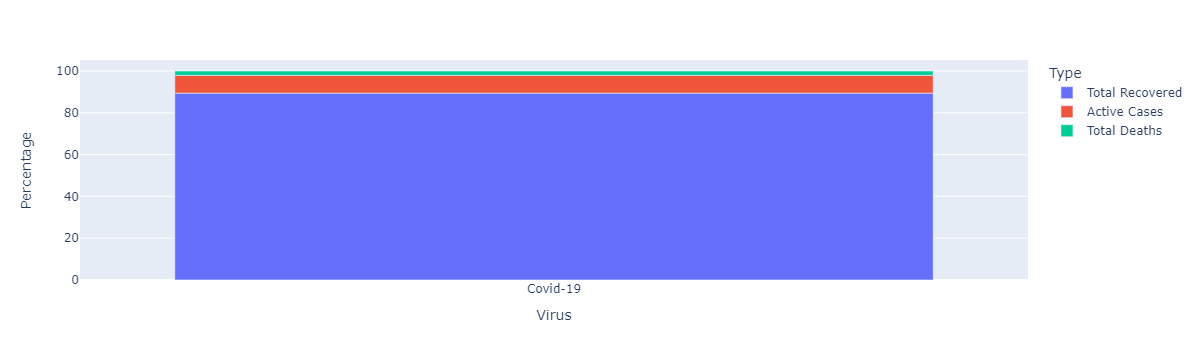

In [104]:
fig = px.bar(cases_df,x='Virus',y='Percentage', color = 'Type', hover_data=['Total'])
fig.show()

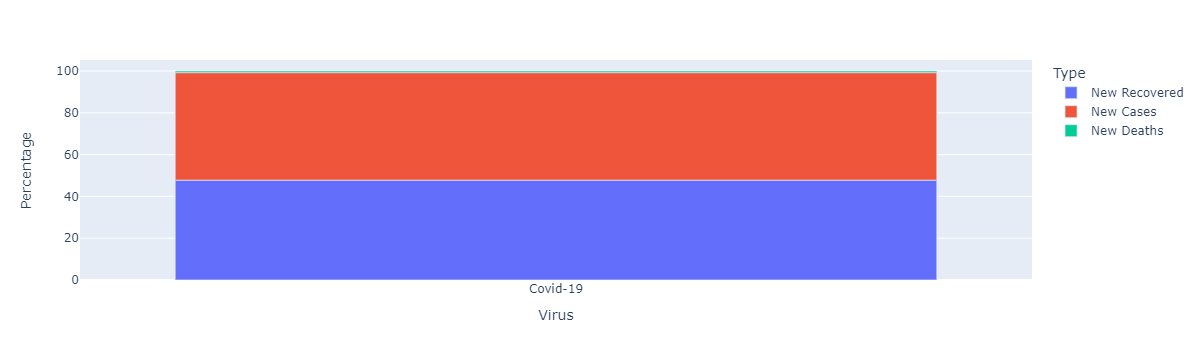

In [105]:
cases = df[['New Recovered','New Cases','New Deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type','Total']
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['Covid-19' for i in range(len(cases_df))]


fig = px.bar(cases_df,x='Virus',y='Percentage', color = 'Type', hover_data=['Total'])
fig.show()

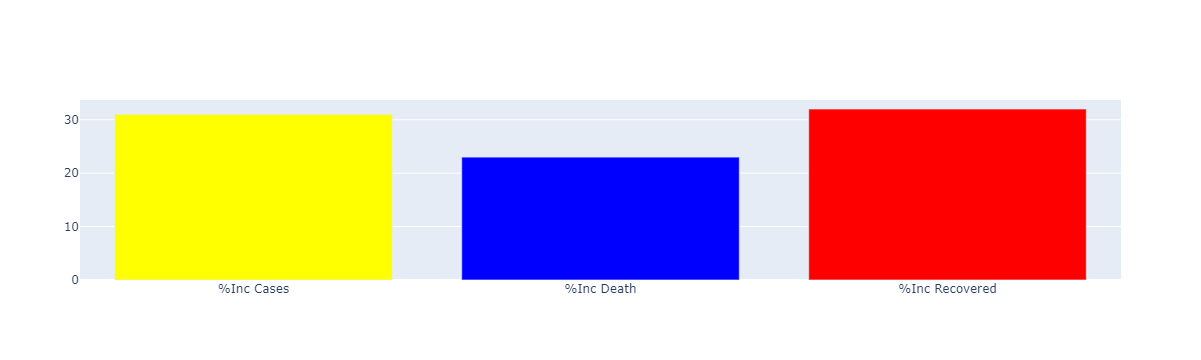

In [114]:
per = np.round(df[['%Inc Cases','%Inc Death','%Inc Recovered']].loc[0],2)
per_df = pd.DataFrame(per)
per_df.columns = ['Percentage']

fig = go.Figure()
fig.add_trace(go.Bar(x=per_df.index, y=per_df['Percentage']*100,marker_color=['Yellow','blue','red']))
fig.show()

In [118]:
continent = df.groupby(['Continent']).sum().drop('All')
continent_df = continent.reset_index()
continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Total Cases/1M,Total Deaths/1M,Total tests,Tests/1M,Population,label,%Inc Cases,%Inc Death,%Inc Recovered
0,Africa,7891089,30354.0,197340,610.0,7011191,38814.0,682558,4401,873844.0,13139.8,66501464,6140482,1377917035,1377917035,20.468479,-109.843243,21.167341
1,Asia,70279477,257284.0,1034758,4445.0,65528843,254506.0,3715875,41400,1913810.0,19016.0,1061157905,45320750,3209705603,3209705603,27.998652,106.233695,39.803817
2,Australia/Oceania,163986,1693.0,2178,20.0,116637,2304.0,45168,235,199469.0,2198.0,35401763,2951331,41484997,41484997,-45.290516,200.055352,106.301221
3,Europe,55471038,137537.0,1174978,1619.0,50608990,139299.0,3687070,11591,4056111.0,71624.0,1189257802,104213315,748156806,748156806,13.094040,-58.375164,13.709483
4,North America,48370192,217561.0,998135,2587.0,37866795,149757.0,9505260,32856,1918901.0,25397.0,661135427,40755285,594487291,594487291,31.900714,-41.991087,28.439529
5,South America,36959928,37789.0,1131697,1108.0,33064189,49370.0,811360,15216,926042.0,25559.0,153742930,8190988,434905023,434905023,4.874877,102.423889,0.682993


In [128]:
def continent_visualization(v_list):
    for label in v_list:
        c_df = continent_df[['Continent', label]]
        c_df['Percentage'] = np.round(100*c_df[label]/np.sum(c_df[label]),2)
        df['Virus'] = ['Covid-19' for i in range(len(c_df))]
        
        fig = px.bar(c_df, x= "Virus", y='Percentage', color= 'Continent', hover_data=[label])
        fig.update_layout(title={'text':f"{label}"})
        fig.show()
        gc.collect()
                                 
                                 

In [126]:
deaths_list = ['Total Deaths','New Deaths','total Deaths/1M']

In [129]:
continent_visualization(deaths_list)

ValueError: Length of values (6) does not match length of index (213)